## Predictive Model for King County House Price Prediction

### Description

The project offers valuations of houses in King County, Washington, using machine learning techniques. The given dataset consists of historic data of houses sold from King County an area in the US State of Washington between May 2014 to May 2015. The dataset was obtained from Kaggle.It contains 21 variables and 14632 observations.

We'll perform data preprocessing and analysis before building predictive models. In model build stage, several basic predictive models and ensembled models are built and evaluated with given dataset. Model that has highest R^2 score on evaluation data will be selected as the final predictive model for house evaluation. In addition, features that impact the house price the most will be extracted and analyzed.

### Data Preprocessing

Data file 'kc_house_data.csv' was read in as input pandas DataFrame for analysis. The dataset has 14633 records and 21 columns. Each column presents one attribute of the house record shown in code output.
<br>Data preprocessing stage involves handling missing values in dataset, creating new features and removing irrelevant and duplicated features. <br>Missing values occurs in columns 'bedrooms' and 'bathrooms'. We replaced missing values with average number of each column. <br>A new column 'last_renovated' was created with information from three other columns to store how many years back the house was renovated. <br>Categorical column 'view' was mapped to numeric values. <br>Columns 'id', 'date' and 'yr_renovated' were removed to clean irelevance and duplicates. <br>After all above process, we got a clean dataset for analysis and model building.

### Predictive Models

Evaluated Models can be classified into 3 groups: Basic predictive models, ensembled models and NeuralNetwork models.
Basic Models: KNN, LinearRegression, LinearSVM, SVM with kernel 'rbf' and 'poly', DecisionTree
Ensembled Models: RandomForest, Bagging and pasting of base models, AdaBoosting of base models, GradientBoosting

For model parameter tuning, GridSearch technique was used to select the best paramters for each model. Cross-validatio of 5-fold is used to calculate model performance.

Feature engineering technique Principle Component Analysis (PCA) was studied to evaluate impact of the feature reduction on predictive models performances.

### Results

[Basic Models Performances](#Basic-Models-Performances)
<br>[Ensemble Models Peformances](#Ensemble-Models-Peformances)
<br>[DTree Feature Importance](#DTree-Feature-Importance)
<br>[Feature Importance from GradientBoosting Model](#Feature-Importance-from-GradientBoosting-Model)

1. Among all the fitted basic predictive models, Decision Tree with paramter 'max_depth' of 11 generates best prediction accuracy score 0.81. 

2. Ensembled models with Decison Tree as base model work better than that with Linear base model. Best ensemble mode is GradientBoosting model with Decision Tree as base model. Accuracy test score of the model is 0.91. Model parameters are 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400.

3. Feature importance:
<br>Feature importance from Decision Tree model indicates that top 5 features that impact the house price the most are 'grade', 'sqft_living', 'lat', 'long' and 'sqft_above'. The latitude and longitude values may have no direct influence on house price. But they do contain some area information that may have big effect on house price.
<br><br>Feature importance from GradientBoosting model has same order for top 4 features as that from Decision Tree model. The fifth feature is 'waterfront' for GradientBoosting model.

### Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Preparing

In [2]:
house = pd.read_csv("data/kc_house_data.csv")
house.info()
house.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14633 non-null  int64  
 1   date           14633 non-null  object 
 2   price          14633 non-null  int64  
 3   bedrooms       14633 non-null  int64  
 4   bathrooms      14633 non-null  float64
 5   sqft_living    14633 non-null  int64  
 6   sqft_lot       14633 non-null  int64  
 7   floors         14633 non-null  float64
 8   waterfront     14633 non-null  int64  
 9   view           14633 non-null  object 
 10  condition      14633 non-null  int64  
 11  grade          14633 non-null  int64  
 12  sqft_above     14633 non-null  int64  
 13  sqft_basement  14633 non-null  int64  
 14  yr_built       14633 non-null  int64  
 15  yr_renovated   14633 non-null  object 
 16  zipcode        14633 non-null  int64  
 17  lat            14633 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.463300e+04,1.463300e+04,14633.000000,14633.000000,14633.000000,1.463300e+04,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000,14633.000000
mean,4.560180e+09,5.392805e+05,3.377161,2.003895,2098.319073,1.495053e+04,1.502631,0.007791,3.429919,7.681542,1802.015240,296.303834,1970.933985,98077.895852,47.562848,-122.213923,1996.840498,12770.057473
std,2.873192e+09,3.694039e+05,0.942636,0.898807,929.621019,3.752184e+04,0.540567,0.087923,0.664473,1.178388,835.193434,448.463475,29.489005,53.407146,0.137514,0.141430,691.376543,26107.338627
min,1.000102e+06,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000
25%,2.115200e+09,3.200000e+05,3.000000,1.500000,1440.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,98033.000000,47.477600,-122.328000,1490.000000,5099.000000
50%,3.902100e+09,4.500000e+05,3.000000,2.000000,1930.000000,7.634000e+03,1.500000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,98065.000000,47.576400,-122.231000,1850.000000,7620.000000
75%,7.298900e+09,6.450000e+05,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,4.000000,8.000000,2240.000000,580.000000,1997.000000,98117.000000,47.678900,-122.125000,2380.000000,10125.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,560617.000000


In [3]:
house.shape

(14633, 21)

- The size of dataset is `14633` with `21` columns.

In [4]:
house['age'] = house['date'].apply(lambda x: int(x[:4])) - house['yr_built']

In [5]:
house[house == 0].all()

id                True
date              True
price             True
bedrooms         False
bathrooms        False
sqft_living       True
sqft_lot          True
floors            True
waterfront       False
view              True
condition         True
grade             True
sqft_above        True
sqft_basement    False
yr_built          True
yr_renovated      True
zipcode           True
lat               True
long              True
sqft_living15     True
sqft_lot15        True
age              False
dtype: bool

- The columns contains 0 are: <b>bedrooms, bathrooms, waterfront, sqft_basement, yr_renovated</b>. Since normal house has at lease 1 bedroom and bathroom, `0 badroom/bathroom` is equal to `missing value` in this dataset.

In [6]:
house['bedrooms'] = house['bedrooms'].replace(0, np.nan)
house['bathrooms'] = house['bathrooms'].replace(0, np.nan)

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14633 non-null  int64  
 1   date           14633 non-null  object 
 2   price          14633 non-null  int64  
 3   bedrooms       14624 non-null  float64
 4   bathrooms      13776 non-null  float64
 5   sqft_living    14633 non-null  int64  
 6   sqft_lot       14633 non-null  int64  
 7   floors         14633 non-null  float64
 8   waterfront     14633 non-null  int64  
 9   view           14633 non-null  object 
 10  condition      14633 non-null  int64  
 11  grade          14633 non-null  int64  
 12  sqft_above     14633 non-null  int64  
 13  sqft_basement  14633 non-null  int64  
 14  yr_built       14633 non-null  int64  
 15  yr_renovated   14633 non-null  object 
 16  zipcode        14633 non-null  int64  
 17  lat            14633 non-null  float64
 18  long  

In [8]:
house[house.isnull().any(axis = 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
5,5100401414,20140502T000000,490000,2.0,NaN,880,6380,1.0,0,Seldom,...,880,0,1938,1994,98115,47.6924,-122.322,1340,6380,76
11,4217401055,20140502T000000,1400000,4.0,NaN,2920,4000,1.5,0,Seldom,...,1910,1010,1909,No,98105,47.6578,-122.280,2470,4000,105
25,5101405331,20140502T000000,495000,4.0,NaN,1600,6380,1.0,0,Seldom,...,1130,470,1959,No,98125,47.7010,-122.306,1090,6380,55
29,1024069009,20140502T000000,675000,5.0,NaN,2820,67518,2.0,0,Seldom,...,2820,0,1979,No,98029,47.5794,-122.025,2820,48351,35
37,587550340,20140502T000000,604000,3.0,NaN,3240,33151,2.0,0,Normal,...,3240,0,1995,No,98023,47.3256,-122.378,4050,24967,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14569,2422049104,20141230T000000,235000,2.0,NaN,830,9000,1.0,0,Seldom,...,830,0,1939,No,98032,47.3813,-122.243,1160,7680,75
14584,8685500145,20141230T000000,350000,3.0,NaN,1920,6710,1.0,0,Seldom,...,1320,600,1959,No,98118,47.5346,-122.286,1810,5600,55
14598,3321069006,20141231T000000,905000,3.0,NaN,3520,237402,2.5,0,Seldom,...,3520,0,2004,No,98092,47.2687,-122.056,2310,165963,10
14604,8093600065,20141231T000000,205000,4.0,NaN,1030,6621,1.0,0,Seldom,...,1030,0,1955,No,98055,47.4857,-122.221,1420,6631,59


### 1.2 Replace NaN Value with Mean Value

In [9]:
house['bedrooms'].fillna((house['bedrooms'].mean()), inplace=True)
house['bathrooms'].fillna((house['bathrooms'].mean()), inplace=True)

In [10]:
house[house.isnull().any(axis = 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age


In [11]:
house['last_renovated'] = pd.DataFrame({'last_renovated': list(map(lambda a, b, r: a if r=='No' else a-int(r)+b, house['age'], house['yr_built'], house['yr_renovated']))})
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,last_renovated
0,1999700045,20140502T000000,313000,3.0,1.50,1340,7912,1.5,0,Seldom,...,0,1955,No,98133,47.7658,-122.339,1480,7940,59,59
1,1860600135,20140502T000000,2380000,5.0,2.50,3650,9050,2.0,0,Popular,...,280,1921,No,98119,47.6345,-122.367,2880,5400,93,93
2,5467900070,20140502T000000,342000,3.0,2.00,1930,11947,1.0,0,Seldom,...,0,1966,No,98042,47.3672,-122.151,2200,12825,48,48
3,4040800810,20140502T000000,420000,3.0,2.25,2000,8030,1.0,0,Seldom,...,1000,1963,No,98008,47.6188,-122.114,2070,8250,51,51
4,7197300105,20140502T000000,550000,4.0,2.50,1940,10500,1.0,0,Seldom,...,800,1976,No,98052,47.6830,-122.114,2200,10500,38,38


### 1.3 Drop Irrelavent Columns

Since this dataset is only the house trading record in 2014, the `date` column is irrelevant. <br>
Also, newly created column `last_renovated` has information of `yr_renovated`, so we decide to drop `yr_renovated`.
- The following columns are dropped since irrelevant:
    - `id`, `date`, `yr_renovated`.

In [12]:
house.drop(['id','date','yr_renovated'], axis=1, inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           14633 non-null  int64  
 1   bedrooms        14633 non-null  float64
 2   bathrooms       14633 non-null  float64
 3   sqft_living     14633 non-null  int64  
 4   sqft_lot        14633 non-null  int64  
 5   floors          14633 non-null  float64
 6   waterfront      14633 non-null  int64  
 7   view            14633 non-null  object 
 8   condition       14633 non-null  int64  
 9   grade           14633 non-null  int64  
 10  sqft_above      14633 non-null  int64  
 11  sqft_basement   14633 non-null  int64  
 12  yr_built        14633 non-null  int64  
 13  zipcode         14633 non-null  int64  
 14  lat             14633 non-null  float64
 15  long            14633 non-null  float64
 16  sqft_living15   14633 non-null  int64  
 17  sqft_lot15      14633 non-null 

### 1.4 Convert Categorical Columns to Numeric

In [13]:
house['view'] = house['view'].map({'Seldom':0, 'Normal':1, 'Popular':2}).astype(int)

In [14]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14633 entries, 0 to 14632
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           14633 non-null  int64  
 1   bedrooms        14633 non-null  float64
 2   bathrooms       14633 non-null  float64
 3   sqft_living     14633 non-null  int64  
 4   sqft_lot        14633 non-null  int64  
 5   floors          14633 non-null  float64
 6   waterfront      14633 non-null  int64  
 7   view            14633 non-null  int32  
 8   condition       14633 non-null  int64  
 9   grade           14633 non-null  int64  
 10  sqft_above      14633 non-null  int64  
 11  sqft_basement   14633 non-null  int64  
 12  yr_built        14633 non-null  int64  
 13  zipcode         14633 non-null  int64  
 14  lat             14633 non-null  float64
 15  long            14633 non-null  float64
 16  sqft_living15   14633 non-null  int64  
 17  sqft_lot15      14633 non-null 

### 1.5 Split Dataset into Train and Test Datasets

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(house, test_size=0.2, random_state=0)
print(train.shape)
print(test.shape)

(11706, 20)
(2927, 20)


In [16]:
train_x = train.iloc[:,1:]
train_y = train[['price']]

test_x = test.iloc[:,1:]
print('x test dataset shape:',test_x.shape)
test_y = test[['price']]

x test dataset shape: (2927, 19)


### 1.6 Apply Feature Scaler

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_x_scaled = sc.fit_transform(train_x)
test_x_scaled = sc.transform(test_x)

### Basic Predictive Models

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#### Decision Tree Model

In [19]:
tree = DecisionTreeRegressor(random_state=0)
depths = [1, 3, 5, 7, 9, 11]

grid_tree = GridSearchCV(tree, param_grid={'max_depth': depths}, scoring='r2', n_jobs=-1)
grid_tree.fit(train_x_scaled, train_y.values.ravel())

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11]}, scoring='r2')

In [20]:
print("Best paramters: {}".format(grid_tree.best_params_))
print("Best train score: {:.2f}".format(grid_tree.best_score_))
print("Test score: {:.2f}".format(grid_tree.best_estimator_.score(test_x_scaled, test_y.values.ravel())))

Best paramters: {'max_depth': 11}
Best train score: 0.76
Test score: 0.81


#### DTree Feature Importance

grade             0.364464
sqft_living       0.230505
lat               0.170463
long              0.078444
sqft_above        0.036574
waterfront        0.033903
sqft_living15     0.025192
zipcode           0.014850
view              0.011288
sqft_lot          0.007739
sqft_lot15        0.007398
age               0.004842
last_renovated    0.003744
yr_built          0.002917
sqft_basement     0.002431
condition         0.002224
bathrooms         0.001502
floors            0.001248
bedrooms          0.000271
dtype: float64

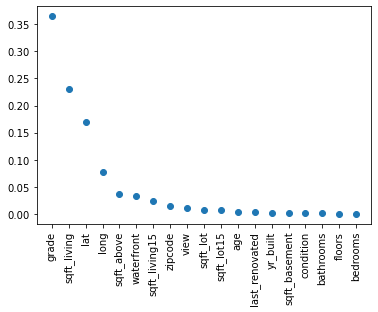

In [21]:
fImp = pd.Series(grid_tree.best_estimator_.feature_importances_, index=train_x.columns).sort_values(ascending=False)
plt.plot(fImp, 'o')
plt.xticks(rotation=90)
fImp

#### Linear Regression

In [22]:
lr = LinearRegression(normalize=True)
lr.fit(train_x_scaled, train_y.values.ravel())
print('Train score: {:.2f}'.format(lr.score(train_x_scaled, train_y.values.ravel())))
print('Test score: {:.2f}'.format(lr.score(test_x_scaled, test_y.values.ravel())))

Train score: 0.70
Test score: 0.70


#### Linear SVR

In [23]:
lsvr = LinearSVR(random_state=0)
c = [100, 500, 1000, 5000]

grid_lsvr = GridSearchCV(lsvr, param_grid={'C': c}, n_jobs=-1)
grid_lsvr.fit(train_x_scaled, train_y.values.ravel())

GridSearchCV(estimator=LinearSVR(random_state=0), n_jobs=-1,
             param_grid={'C': [100, 500, 1000, 5000]})

In [24]:
print('Best paramter: {}'.format(grid_lsvr.best_params_))
print('Train score: {:.2f}'.format(grid_lsvr.best_score_))
print('Test score: {:.2f}'.format(grid_lsvr.best_estimator_.score(test_x_scaled, test_y.values.ravel())))

Best paramter: {'C': 5000}
Train score: 0.66
Test score: 0.64


#### SVR with polynomial kernel

In [25]:
from sklearn.svm import SVR

svr_poly = SVR(kernel='poly', gamma='auto')
c = [100, 100, 1000, 5000]
degrees = [1, 2, 3]

grid_svrPoly = GridSearchCV(svr_poly, param_grid={'C': c, 'degree':degrees}, n_jobs=-1)
grid_svrPoly.fit(train_x_scaled, train_y.values.ravel())

GridSearchCV(estimator=SVR(gamma='auto', kernel='poly'), n_jobs=-1,
             param_grid={'C': [100, 100, 1000, 5000], 'degree': [1, 2, 3]})

In [26]:
print('Best model paramters: {}'.format(grid_svrPoly.best_params_))
print('Best train score: {:.2f}'.format(grid_svrPoly.best_score_))
print('Test score: {:.2f}'.format(grid_svrPoly.best_estimator_.score(test_x_scaled, test_y.values.ravel())))

Best model paramters: {'C': 5000, 'degree': 1}
Best train score: 0.65
Test score: 0.63


#### SVM with kernal 'RBF'

In [27]:
from sklearn.svm import SVR

svr_poly = SVR(kernel='rbf')
c = [100, 1000, 5000]
gammas = [0.1, 0.3, 0.6]
epsilon = [0.1, 0.3]

grid_svrRBF = GridSearchCV(svr_poly, param_grid={'C': c, 'epsilon': epsilon, 'gamma':gammas}, n_jobs=-1)
grid_svrRBF.fit(train_x_scaled, train_y.values.ravel())

GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [100, 1000, 5000], 'epsilon': [0.1, 0.3],
                         'gamma': [0.1, 0.3, 0.6]})

In [28]:
print('Best model paramters: {}'.format(grid_svrRBF.best_params_))
print('Best train score: {:.2f}'.format(grid_svrRBF.best_score_))
print('Test score: {:.2f}'.format(grid_svrRBF.best_estimator_.score(test_x_scaled, test_y.values.ravel())))

Best model paramters: {'C': 5000, 'epsilon': 0.3, 'gamma': 0.1}
Best train score: 0.41
Test score: 0.31


#### KNN

In [29]:
knn = KNeighborsRegressor()
ks = [3, 5, 7, 9]
weights = ['distance', 'uniform']
grid_knn = GridSearchCV(knn, param_grid={'n_neighbors': ks, 'weights':weights}, n_jobs=-1)
grid_knn.fit(train_x_scaled, train_y.values.ravel())

GridSearchCV(estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['distance', 'uniform']})

In [30]:
print('Best paramter: {}'.format(grid_knn.best_params_))
print('Best train score: {:.2f}'.format(grid_knn.best_score_))
print('Test score: {:.2f}'.format(grid_knn.best_estimator_.score(test_x_scaled, test_y.values.ravel())))

Best paramter: {'n_neighbors': 9, 'weights': 'distance'}
Best train score: 0.79
Test score: 0.76


#### Summary of Basic Model Results

In [31]:
model_scores = pd.DataFrame({'Train_scores' : lr.score(train_x_scaled, train_y.values.ravel()), 
                            'Test_score': lr.score(test_x_scaled, test_y.values.ravel())}
                                                                 , index=['LR'])
for label, model in zip(['DT', 'knn', 'LSVM', 'SVM_RBF', 'SVM_POLY'],
                       [grid_tree, grid_knn, grid_lsvr, grid_svrRBF, grid_svrPoly]):
    df = pd.DataFrame({'Train_scores': model.best_score_,
                                      'Test_score': model.best_estimator_.score(test_x_scaled, test_y.values.ravel())}, 
                                     index=[label])
    model_scores = model_scores.append(df)


#### Basic Models Performances

,Train_scores,Test_score
LR,0.703995,0.704498
DT,0.757478,0.813294
knn,0.785806,0.763404
LSVM,0.662961,0.639218
SVM_RBF,0.406483,0.311913
SVM_POLY,0.650033,0.626208


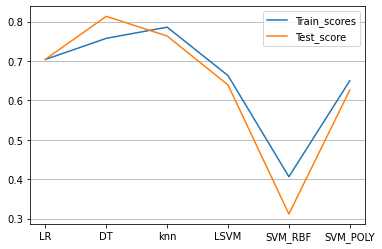

In [32]:
plt.plot(model_scores)
plt.legend(model_scores)
plt.grid(axis='y')

model_scores

### Ensemble Regression Models
    

In [33]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

#### Model1 - Bagging with Linear Regression as Base Model

In [34]:
n_estimators = [100, 200, 500]
max_samples = [0.5, 0.7, 1.0]
lr = LinearRegression()
bag_lr = BaggingRegressor(lr, bootstrap=True, oob_score=True, random_state=0)
grid_blr = GridSearchCV(bag_lr, param_grid={'n_estimators': n_estimators, 'max_samples': max_samples}, n_jobs=-1)
grid_blr.fit(train_x_scaled, train_y.values.ravel())

GridSearchCV(estimator=BaggingRegressor(base_estimator=LinearRegression(),
                                        oob_score=True, random_state=0),
             n_jobs=-1,
             param_grid={'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [100, 200, 500]})

In [35]:
print('Best model parameters : ' + str(grid_blr.best_params_))
print('Best train score : {:.2f}'.format(grid_blr.best_score_))
print('oob score of the best bagging model : {:.2f}'.format(grid_blr.best_estimator_.oob_score_))

Best model parameters : {'max_samples': 0.7, 'n_estimators': 100}
Best train score : 0.70
oob score of the best bagging model : 0.70


In [36]:
pred_baglr = grid_blr.best_estimator_.predict(test_x_scaled)
print('Test r2 score : {:.2f}'.format(r2_score(test_y, pred_baglr)))
print('Test score : {:.2f}'.format(grid_blr.best_estimator_.score(test_x_scaled, test_y)))

lr.fit(train_x_scaled, train_y)
print('\nBase Linear regression model train score: {:.2f}'.format(lr.score(train_x_scaled, train_y)))
print('Base model Linear regression test score: {:.2f}'.format(lr.score(test_x_scaled, test_y)))

Test r2 score : 0.70
Test score : 0.70

Base Linear regression model train score: 0.70
Base model Linear regression test score: 0.70


#### Model2 - Pasting with Linear Regression as Base Model

In [37]:
lr = LinearRegression()
pst_lr = BaggingRegressor(lr, bootstrap=False, random_state=0)

estimators = [100, 200, 500]
samples = [0.5, 0.7, 1.0]
features = [0.5, 0.7, 1.0]
grid_pst = GridSearchCV(pst_lr, param_grid={'n_estimators': estimators,
                                           'max_samples': samples,
                                           'max_features': features}, n_jobs=-1)
grid_pst.fit(train_x_scaled, train_y.values.ravel())

GridSearchCV(estimator=BaggingRegressor(base_estimator=LinearRegression(),
                                        bootstrap=False, random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [100, 200, 500]})

In [38]:
print('Best paramters: {}'.format(grid_pst.best_params_))
print('Best train score: {:.2f}'.format(grid_pst.best_score_))
print('Test score: {:.2f}'.format(grid_pst.best_estimator_.score(test_x_scaled, test_y.values.ravel())))

Best paramters: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 500}
Best train score: 0.70
Test score: 0.70


#### Model3 - Pasting with Ridge as Base Model

In [39]:
ridge = Ridge(alpha = 1)
estimators = [100, 200]
samples = [0.3, 0.5, 0.7]
features = [0.5, 0.8, 1]
bag = BaggingRegressor(ridge, bootstrap=False, random_state=0)
grid_bag = GridSearchCV(bag, param_grid={'n_estimators': estimators, 
                                         'max_samples': samples,
                                        'max_features': features}, n_jobs=-1)
grid_bag.fit(train_x_scaled, train_y.values.ravel())


GridSearchCV(estimator=BaggingRegressor(base_estimator=Ridge(alpha=1),
                                        bootstrap=False, random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [0.5, 0.8, 1],
                         'max_samples': [0.3, 0.5, 0.7],
                         'n_estimators': [100, 200]})

In [40]:
print('Best GridSearch paramters: {}'.format(grid_bag.best_params_))
print('Train score of paste_bag is : {:.2f}'.format(grid_bag.best_score_))
pred_paste = grid_bag.predict(test_x_scaled)
print('Test R2 score of the paste model: {:.2f}'.format(r2_score(test_y, pred_paste)))
print('Test score of the paste model: {:.2f}'.format(grid_bag.score(test_x_scaled, test_y)))

ridge.fit(train_x_scaled, train_y)
print('\nTrain score of base model: {:.2f}'.format(ridge.score(train_x_scaled, train_y)))
print('Test score of base model ridge: {:.2f}'.format(ridge.score(test_x_scaled, test_y)))

Best GridSearch paramters: {'max_features': 0.8, 'max_samples': 0.5, 'n_estimators': 100}
Train score of paste_bag is : 0.70
Test R2 score of the paste model: 0.70
Test score of the paste model: 0.70

Train score of base model: 0.70
Test score of base model ridge: 0.70


#### Model4 - Random Forest

In [41]:
rf = RandomForestRegressor(oob_score=True, random_state=0)
estimators = [100, 200, 500]
depths = [3, 5, 9]
samples = [0.3, 0.6, 0.8, 1]
features = [0.3, 0.5, 0.8, 1]
bootstrap = [True, False]
grid_rf = GridSearchCV(rf, param_grid={'n_estimators': estimators,
                                      'max_samples': samples,
                                      'max_depth': depths,
                                      'max_features': features,
                                      'bootstrap': bootstrap},
                      n_jobs=-1)
grid_rf.fit(train_x_scaled, train_y.values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ 6.42678824e-01  6.42764017e-01  6.43586886e-01  6.38725632e-01
  6.41549946e-01  6.42144926e-01  6.38949424e-01  6.41210870e-01
  6.41788350e-01 -6.97683083e-04 -1.78189833e-03 -1.85000262e-03
  6.61485331e-01  6.66928064e-01  6.68930274e-01  6.63169887e-01
  6.67160027e-01  6.67644735e-01  6.64348874e-01  6.66164960e-01
  6.67331874e-01 -6.97683083e-04 -1.78189833e-03 -1.85000262e-03
  6.77992265e-01  6.76455832e-01  6.76871431e-01  6.71687380e-01
  6.72048793e-01  6.72348899e-01  6.69588675e-01  6.69661493e-01
  6.70438955e-01 -6.97683083e-04 -1.78189833e-03 -1.85000262e-03
  4.44442277e-01  4.50842215e-01  4.50995641e-01  4.40318990e-01
  4.50992222e-01  4.50928467e-01  4.41678074e-01  4.50411797e-01
  4.51029497e-01 -6.97683083e-04 -1.78189833e-03 -1.85000262e-03
  7.49928720e-01  7.51353436e-01  7.53666551e-01  7.53156060e-01
  7.56167373

GridSearchCV(estimator=RandomForestRegressor(oob_score=True, random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5, 9],
                         'max_features': [0.3, 0.5, 0.8, 1],
                         'max_samples': [0.3, 0.6, 0.8, 1],
                         'n_estimators': [100, 200, 500]})

In [42]:
print('Best model paramters: {}'.format(grid_rf.best_params_))
print('Best train score: {:.2f}'.format(grid_rf.best_score_))
print('Test score: {:.2f}'.format(grid_rf.best_estimator_.score(test_x_scaled, test_y.values.ravel())))

Best model paramters: {'bootstrap': True, 'max_depth': 9, 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 500}
Best train score: 0.86
Test score: 0.87


#### Model5 - AdaBoost with DecisionTree as Base Model

In [43]:
tree = DecisionTreeRegressor()
adab_tree = AdaBoostRegressor(tree, random_state=0)
n_estimators = [50, 100, 200, 500]
learn_rate = [0.2, 0.6, 1]
loss = ['linear', 'square', 'exponential']
grid_abdt = GridSearchCV(adab_tree, param_grid={'n_estimators': n_estimators, 
                                                'learning_rate': learn_rate,
                                               'loss': loss}, n_jobs=-1)
# Use unscaled predictor data
grid_abdt.fit(train_x_scaled, train_y.values.ravel())

GridSearchCV(estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.6, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 200, 500]})

In [44]:
print('Best parameters for AdaBoost tree model: ' + str(grid_abdt.best_params_))
adab_tree = grid_abdt.best_estimator_
#adab_tree.fit(train_x_scaled, train_y.values.ravel())
pred_y = adab_tree.predict(test_x_scaled)
print('Test R2 score of AdaBoost tree model: {:.2f}'.format(r2_score(test_y, pred_y)))
print('Train score : {:.2f}'.format(grid_abdt.best_score_))
print('Test accuracy score of AdaBoost tree model: {:.2f}\n'.format(adab_tree.score(test_x_scaled, test_y.values.ravel())))

tree.fit(train_x_scaled, train_y)
print('Test accuracy score of base model DecisionTree is : {:.2f}'.format(tree.score(test_x_scaled, test_y.values.ravel())) )

Best parameters for AdaBoost tree model: {'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 500}
Test R2 score of AdaBoost tree model: 0.90
Train score : 0.87
Test accuracy score of AdaBoost tree model: 0.90

Test accuracy score of base model DecisionTree is : 0.81


#### Model6 - AdaBoost with Linear Regression as Base Model

In [45]:
lr = LinearRegression()
adab_lr = AdaBoostRegressor(lr, random_state=0)

n_estimators = [50, 100, 500]
learn_rate = [0.001, 0.1, 0.2, 0.5]
loss = ['linear', 'square', 'exponential']
grid_ablr = GridSearchCV(adab_lr, param_grid={'n_estimators': n_estimators, 
                                              'learning_rate': learn_rate,
                                             'loss': loss}, n_jobs=-1)
grid_ablr.fit(train_x_scaled, train_y.values.ravel())

GridSearchCV(estimator=AdaBoostRegressor(base_estimator=LinearRegression(),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 0.2, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 500]})

In [46]:
print('Best parameters for AdaBoost LR model: ' + str(grid_ablr.best_params_))
adab_lr = grid_ablr.best_estimator_
#adab_lr.fit(train_x_scaled, train_y.values.ravel())
pred_y = adab_lr.predict(test_x_scaled)
print("Train score: {:.2f}".format(grid_ablr.best_score_))
print('Test accuracy score of AdaBoost LR model: {:.2f}'.format(adab_lr.score(test_x_scaled, test_y.values.ravel())))
print('Test R2 score of AdaBoost LR model: {:.2f}\n'.format(r2_score(test_y, pred_y)))

lr.fit(train_x_scaled, train_y)
print("LR train score: {:.2f}".format(lr.score(train_x_scaled, train_y)))
print('Test accuracy score of base model LinearRegression is : {:.2f}'.format(lr.score(test_x_scaled, test_y.values.ravel())) )

Best parameters for AdaBoost LR model: {'learning_rate': 0.001, 'loss': 'exponential', 'n_estimators': 100}
Train score: 0.70
Test accuracy score of AdaBoost LR model: 0.71
Test R2 score of AdaBoost LR model: 0.71

LR train score: 0.70
Test accuracy score of base model LinearRegression is : 0.70


#### Model7 - GradientBoosting Model

In [47]:
grdBoost = GradientBoostingRegressor(random_state=0)
max_depth = [1, 3, 5]
n_estimators = [100, 200, 400]
learn_rate = [0.1, 0.2, 0.5]

grid_gb = GridSearchCV(grdBoost, param_grid={'max_depth': max_depth, 'n_estimators': n_estimators, 'learning_rate': learn_rate}, n_jobs=-1)
grid_gb.fit(train_x_scaled, train_y.values.ravel())

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [100, 200, 400]})

In [48]:
print('Best parameters :'+ str(grid_gb.best_params_))
print('\nTrain accuracy score of GradientBoosting model: {:.2f}'.format(grid_gb.best_score_))
print('Test accuracy score of GradientBoosting model: {:.2f}'.format(grid_gb.best_estimator_.score(test_x_scaled, test_y.values.ravel())))

Best parameters :{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400}

Train accuracy score of GradientBoosting model: 0.90
Test accuracy score of GradientBoosting model: 0.91


#### Feature Importance from GradientBoosting Model

grade             0.320821
sqft_living       0.241513
lat               0.166433
long              0.077014
waterfront        0.039586
sqft_living15     0.033385
sqft_above        0.031361
zipcode           0.016070
view              0.013261
yr_built          0.012764
age               0.012589
sqft_lot          0.008223
sqft_lot15        0.006695
bathrooms         0.005953
last_renovated    0.005410
sqft_basement     0.003743
condition         0.003206
bedrooms          0.001228
floors            0.000744
dtype: float64

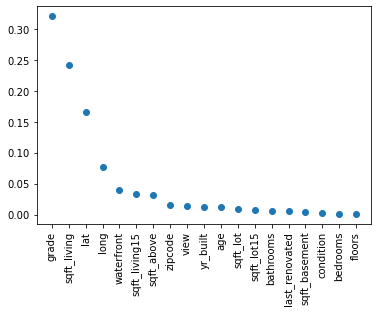

In [49]:
fImp_ensemble = pd.Series(grid_gb.best_estimator_.feature_importances_, 
                         index=train.columns[1:]).sort_values(ascending=False)
plt.plot(fImp_ensemble, 'o')
plt.xticks(rotation=90)
fImp_ensemble

#### Summary of Ensembled Models Results

In [50]:
ens_scores = pd.DataFrame(columns=['Train score', 'Test score'])

for label, model in zip(['bgLR', 'PSTLR', 'PSTRDG', 'RF', 'ABDT', 'ABLR','GB'],
                       [grid_blr, grid_pst, grid_bag, grid_rf, grid_abdt, grid_ablr, grid_gb]):
    score = {'Train score': model.best_score_,
            'Test score': model.best_estimator_.score(test_x_scaled, test_y.values.ravel())}
    #print(score)
    ens_scores = ens_scores.append(pd.DataFrame(score, index=[label]))

#### Ensemble Models Peformances

,Train score,Test score
bgLR,0.698542,0.704328
PSTLR,0.698394,0.704625
PSTRDG,0.695320,0.701242
RF,0.855613,0.870205
ABDT,0.868010,0.899422
ABLR,0.698366,0.705564
GB,0.898182,0.906135


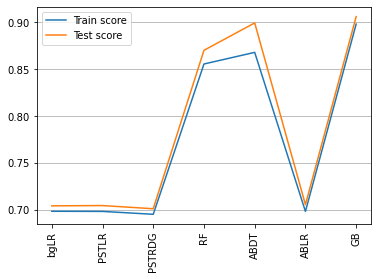

In [51]:
plt.plot(ens_scores)
plt.xticks(rotation=90)
plt.legend(ens_scores)
plt.grid(axis='y')
ens_scores

### PCA
Using PCA to perform feature reduction. 95% feature variance of original data set are extracted and presented by output principle components. Number of features are reduced to 13 from original 19.

#### Comparison of models before and after PCA


|No|Regressions|Original Score|PCA|
|:--|:-----------|:---------------|:-------------|
|1|KNN|0.76|0.75|
|2|Linear Regression|0.70|0.69|
|3|Linear SVR|0.64|0.24| 
|4|SVR with Kernel RBF|0.31|0.20|
|5|SVR with Kernel Polynomial|0.56|0.58|
|6|Decision tree|0.81|0.59|

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=0)

reduced_train_x = pca.fit_transform(train_x_scaled)
#reduced_eval_x = pca.transform(eval_x_ssc)
reduced_test_x = pca.transform(test_x_scaled)

print('Number of original test set components : ' + str(train_x_scaled.shape[1]))
print('Number of test set components after PCA with 95% feature information : ' + str(pca.n_components_))
reduced_train_x.shape

Number of original test set components : 19
Number of test set components after PCA with 95% feature information : 13


(11706, 13)

#### KNN

In [53]:
from sklearn.neighbors import KNeighborsRegressor

k = [1, 3, 5, 9]
knn = KNeighborsRegressor()
grid_knn = GridSearchCV(knn, param_grid={'n_neighbors': k}, n_jobs=-1)
grid_knn.fit(reduced_train_x, train_y.values.ravel())

print('KNN best model paramters: {}'.format(grid_knn.best_params_))
print('PCA train score KNN: {:.2f}'.format(grid_knn.best_score_))
print('PCA test score KNN: {:.2f}'.format(grid_knn.best_estimator_.score(reduced_test_x, test_y.values.ravel())))

KNN best model paramters: {'n_neighbors': 9}
PCA train score KNN: 0.78
PCA test score KNN: 0.75


#### Linear Regression Model

In [54]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(reduced_train_x, train_y.values.ravel())
print('PCA train score LR: {:.2f}'.format(lr.score(reduced_train_x, train_y.values.ravel())))
print('PCA test score LR: {:.2f}'.format(lr.score(reduced_test_x, test_y.values.ravel())))

PCA train score LR: 0.69
PCA test score LR: 0.69


#### Ridge Model

In [55]:
from sklearn.linear_model import Ridge

alphas = [0.1, 0.5, 1, 10]
ridge = Ridge(random_state=0)
grid_ridge = GridSearchCV(ridge, param_grid={'alpha': alphas}, n_jobs=-1)
grid_ridge.fit(reduced_train_x, train_y.values.ravel())

print('Best model parameters:{}'.format(grid_ridge.best_params_))
print('PCA train score: {:.2f}'.format(grid_ridge.best_score_))
print('PCA test score: {:.2f}'.format(grid_ridge.best_estimator_.score(reduced_test_x, test_y.values.ravel())))

Best model parameters:{'alpha': 10}
PCA train score: 0.69
PCA test score: 0.69


#### Model4 - Lasso

In [56]:
from sklearn.linear_model import Lasso

alphas = [0.01, 0.1, 1, 10]
lso = Lasso(random_state=0)
grid_lso = GridSearchCV(lso, param_grid={'alpha': alphas}, n_jobs=-1)
grid_lso.fit(reduced_train_x, train_y.values.ravel())

print('Best model paramters LASSO: {}'.format(grid_lso.best_params_))
print('PCA trains score LASSO: {:.2f}'.format(grid_lso.best_score_))
print('PCA test score LASSO: {:.2f}'.format(grid_lso.best_estimator_.score(reduced_test_x, test_y.values.ravel())))

Best model paramters LASSO: {'alpha': 10}
PCA trains score LASSO: 0.69
PCA test score LASSO: 0.69


#### Linear SVR

In [57]:
from sklearn.svm import LinearSVR

cs = [0.1, 1, 10]
losses = ['epsilon_insensitive', 'squared_epsilon_insensitive']
lsvr = LinearSVR(random_state=0)
grid_lsvr = GridSearchCV(lsvr, param_grid={'C': cs,
                                          'loss': losses}, n_jobs=-1)
grid_lsvr.fit(reduced_train_x, train_y.values.ravel())

print('Best model paramters: {}'.format(grid_lsvr.best_params_))
print('PCA train score: {:.2f}'.format(grid_lsvr.best_score_))
print('PCA test score: {:.2f}'.format(grid_lsvr.best_estimator_.score(reduced_test_x, test_y.values.ravel())))


Best model paramters: {'C': 1, 'loss': 'squared_epsilon_insensitive'}
PCA train score: 0.69
PCA test score: 0.69


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### SVR with Kernel RBF

In [58]:
gammas = [0.1, 0.3, 0.7]
Cs = [0.1, 1, 10, 100, 1000]
svr_rbf = SVR(kernel='rbf')
grid_svrRBF = GridSearchCV(svr_rbf, param_grid={'C': Cs,
                                                'gamma': gammas}, n_jobs=-1)
grid_svrRBF.fit(reduced_train_x, train_y.values.ravel())

print('Best model paramters: {}'.format(grid_svrRBF.best_params_))
print('PCA train score SVR_RBF: {:.2f}'.format(grid_svrRBF.best_score_))
print('PCA test score SVR_RBF: {:.2f}'.format(grid_svrRBF.best_estimator_.score(reduced_test_x, test_y.values.ravel())))

Best model paramters: {'C': 1000, 'gamma': 0.1}
PCA train score SVR_RBF: 0.27
PCA test score SVR_RBF: 0.20


#### SVR with Polynomial Kernel

In [59]:
degrees = [1, 2, 3]
Cs = [1, 10, 100, 1000]
svr_poly = SVR(kernel='poly')
grid_svr_POLY = GridSearchCV(svr_poly, param_grid={'degree': degrees,
                                                  'C': Cs}, n_jobs=-1)
grid_svr_POLY.fit(reduced_train_x, train_y.values.ravel())

print('Best model parameters: {}'.format(grid_svr_POLY.best_params_))
print('PCA train score : {:.2f}'.format(grid_svr_POLY.best_score_))
print('PCA test score: {:.2f}'.format(grid_svr_POLY.best_estimator_.score(reduced_test_x, test_y.values.ravel())))

Best model parameters: {'C': 1000, 'degree': 1}
PCA train score : 0.60
PCA test score: 0.58


#### Decision Tree Regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor

depths = [3, 5, 9, 12, 15]
features = [0.4, 0.7, 0.9, 1]
dtree = DecisionTreeRegressor(random_state=0)
grid_dtree = GridSearchCV(dtree, param_grid={'max_depth': depths,
                                            'max_features': features}, n_jobs=-1)
grid_dtree.fit(reduced_train_x, train_y.values.ravel())

print('Best model paramters: {}'.format(grid_dtree.best_params_))
print('PCA train score: {:.2f}'.format(grid_dtree.best_score_))
print('PCA test score: {:.2f}'.format(grid_dtree.best_estimator_.score(reduced_test_x, test_y.values.ravel())))


Best model paramters: {'max_depth': 9, 'max_features': 0.9}
PCA train score: 0.59
PCA test score: 0.59


## Deep machine learning

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [62]:
train_x_scaled.shape

(11706, 19)

In [63]:
from sklearn.metrics import r2_score

def create_model():
    model = Sequential()
    model.add(Dense(19, input_dim=19, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(5, activation="relu"))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss="mse", optimizer='adam', metrics=['mse'])
    
    return model

In [64]:
from sklearn.model_selection import GridSearchCV

np.random.seed(10)
model = KerasRegressor(build_fn=create_model, verbose=1)

params = {'batch_size':[10, 20, 32], 'epochs':[20, 40, 100, 200]}
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [65]:
grid_search.fit(train_x_scaled, train_y.values)
grid_search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/100
1171/1171 [==============================] - 12s 471us/step - loss: 407235601418.4846 - mse: 407235601418.4846
Epoch 2/100
1171/1171 [==============================] - 1s 464us/step - loss: 421874329844.6417 - mse: 421874329844.6417
Epoch 3/100
1171/1171 [==============================] - 1s 465us/step - loss: 425629611479.8089 - mse: 425629611479.8089
Epoch 4/100
1171/1171 [==============================] - 1s 467us/step - loss: 411955238597.4608 - mse: 411955238597.4608
Epoch 5/100
1171/1171 [==============================] - 1s 467us/step - loss: 402620857724.9420 - mse: 402620857724.9420
Epoch 6/100
1171/1171 [==============================] - 1s 470us/step - loss: 431153513510.4437 - mse: 431153509624.1365
Epoch 7/100
1171/1171 [==============================] - 1s 469us/step - loss: 407406751883.7952 - mse: 407406751869.8157
Epoch 8/100
1171/1171 [==============================] - 1s 470us/step - loss: 403915070229.8430 - mse: 403915069754.5392
Epoch 9/100
1171/1171 [

1171/1171 [==============================] - 1s 463us/step - loss: 432955547032.9010 - mse: 432955547032.9010
Epoch 68/100
1171/1171 [==============================] - 1s 466us/step - loss: 411006357070.6348 - mse: 411006357070.6348
Epoch 69/100
1171/1171 [==============================] - 1s 467us/step - loss: 413213103799.4812 - mse: 413213103799.4812
Epoch 70/100
1171/1171 [==============================] - 1s 468us/step - loss: 409250639522.5120 - mse: 409250639522.5120
Epoch 71/100
1171/1171 [==============================] - 1s 466us/step - loss: 420106813523.8771 - mse: 420106813523.8771
Epoch 72/100
1171/1171 [==============================] - 1s 468us/step - loss: 405464490501.2423 - mse: 405464490501.2423
Epoch 73/100
1171/1171 [==============================] - 1s 472us/step - loss: 420545410855.3174 - mse: 420545412057.5563
Epoch 74/100
1171/1171 [==============================] - 1s 467us/step - loss: 420254561248.5461 - mse: 420254561388.3413
Epoch 75/100
1171/1171 [=====

{'batch_size': 10, 'epochs': 100}

In [66]:
batches = grid_search.best_params_['batch_size']
epochs = grid_search.best_params_['epochs']

In [67]:
model = grid_search.best_estimator_
#model.fit(train_x_scaled, train_y, epochs=epochs, batch_size=batches, verbose=1)

In [68]:
grid_search.cv_results_
grid_search.best_score_

-415697834655.52277

In [69]:
pred_test = model.predict(test_x_scaled)
pred_train = model.predict(train_x_scaled)

1171/1171 [==============================] - 0s 292us/step


In [70]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

print(model.score(train_y, pred_train))

print("Train R2 score: {:.2f}".format(r2_score(train_y, pred_train)))
print("Test R2 score: {:.2f}".format(r2_score(test_y, pred_test)))
print("Train mse : {:e}".format(mean_squared_error(train_y, pred_train)))
print("Test mse : {:e}".format(mean_squared_error(test_y, pred_test)))
print("Train explained variance score : {:e}".format(explained_variance_score(train_y, pred_train)))
print("Test explained variance score : {:e}".format(explained_variance_score(test_y, pred_test)))

ValueError: in user code:

    C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1298 test_function  *
        return step_function(self, iterator)
    C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1282 run_step  *
        outputs = model.test_step(data)
    C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1241 test_step  *
        y_pred = self(x, training=False)
    C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 19 but received input with shape (None, 1)


In [ ]:
from sklearn.metrics import r2_score
import keras

class r2_score(keras.metrics.Metric):
    def __init__(self, name='r2_score', **kwargs):
        super(r2_score, self).__init__(name=name, **kwargs)
        self.r2 = 0.0
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        #y_pred = tf.reshape(rtf.argmax(y_pred, axis=1), shape=(-1, 1))
        values = r2_score(y_true, y_pred, sample_weight)
        self.r2 = values
    
    def result(self):
        return self.r2
    
    def reset_states(self):
        self.r2.assign(0.0)